In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation
import itertools
import glob

import statsmodels.api as sm
import statsmodels.formula.api as smf


In [2]:
csv_total = '/home/extop/GERARD/DATA/MAGNIMS2021/data_total.csv'
csv_values = '/home/extop/GERARD/DATA/MAGNIMS2021/extracted_values.csv'

df_total = pd.read_csv(csv_total)
df_values = pd.read_csv(csv_values)

df_total.head()
df_values.head()

,SubjID,CENTER,GM,GMF,WM,WMF,CSF,CSFF,LV,LVF,...,RDlwm_std,RDl_mean,RDl_std,RD_gm,RD_gmwm,Meta,Meta_noreg,Meta_t1_noband,Meta_t1_band,Meta_t1_band_007
0,FIS_028,CLINIC,620443.679184,0.447621,419882.830462,0.302925,459751.907118,0.331689,2698.0,0.001946,...,0.000282,0.001335,0.000309,0.001025,1.560122,0.170303,0.122641,0.122641,0.136585,0.346497
1,FIS_029,CLINIC,636775.943650,0.455623,421098.380372,0.301303,442580.865384,0.316674,2402.0,0.001719,...,0.000301,0.001119,0.000246,0.000933,1.446512,0.187773,0.142147,0.142147,0.146729,0.327970
2,FIS_041,CLINIC,601363.278929,0.401018,392575.667712,0.261789,504647.021772,0.336523,9404.0,0.006271,...,0.000344,0.001208,0.000334,0.001092,1.535865,0.129634,0.108726,0.108726,0.123680,0.344621
3,FIS_047,CLINIC,647298.226670,0.413090,498486.740644,0.318122,556908.107184,0.355406,10296.0,0.006571,...,0.000320,0.001232,0.000524,0.001048,1.629860,0.119770,0.095934,0.095934,0.105032,0.361739
4,FIS_048,CLINIC,568135.458184,0.434002,366388.404742,0.279886,414854.188398,0.316910,3279.0,0.002505,...,0.000289,0.001133,0.000232,0.000998,1.579114,0.138016,0.197502,NaN,NaN,NaN


In [3]:
df_merged = pd.merge(df_total, df_values, on=["SubjID", "CENTER"])
df_merged.head()

,SubjID,DOB,SEX,GROUP,ONSET_DATE,MR_DATE,TREATMENT_AT_MRI,TREATMENT,EDSS,YED,...,RDlwm_std,RDl_mean,RDl_std,RD_gm,RD_gmwm,Meta,Meta_noreg,Meta_t1_noband,Meta_t1_band,Meta_t1_band_007
0,FIS_028,01/12/1977,F,RRMS,01/07/2003,04/10/2016,Y,Interferon,2.5,>17 years,...,0.000282,0.001335,0.000309,0.001025,1.560122,0.170303,0.122641,0.122641,0.136585,0.346497
1,FIS_029,24/04/1970,F,RRMS,01/05/1995,31/08/2016,Y,Interferon,1.0,>17 years,...,0.000301,0.001119,0.000246,0.000933,1.446512,0.187773,0.142147,0.142147,0.146729,0.327970
2,FIS_041,15/04/1949,F,RRMS,15/02/1976,23/09/2016,N,NONE,6.0,0-8 years,...,0.000344,0.001208,0.000334,0.001092,1.535865,0.129634,0.108726,0.108726,0.123680,0.344621
3,FIS_047,04/07/1951,M,RRMS,14/04/2003,15/10/2016,Y,Glatiramer,3.5,0-12 years,...,0.000320,0.001232,0.000524,0.001048,1.629860,0.119770,0.095934,0.095934,0.105032,0.361739
4,FIS_048,09/10/1966,F,RRMS,01/08/1989,29/10/2016,Y,Interferon,2.0,0-12 years,...,0.000289,0.001133,0.000232,0.000998,1.579114,0.138016,0.197502,NaN,NaN,NaN


In [4]:
# create continuous in df_merged
df_merged["GROUP_int"] = df_merged['GROUP'].replace(to_replace=['HC', 'RRMS', 'SPMS', 'PPMS'], value=[0, 1, 2, 3])
df_merged["CENTER_int"] = df_merged['CENTER'].replace(to_replace=['CLINIC', 'MAINZ', 'MILAN', 'NAPLES', 'OSLO'], value=[0, 1, 2, 3, 4])
df_merged["SEX_int"] = df_merged['SEX'].replace(to_replace=['F', 'M'], value=[0, 1])
df_merged.to_csv('/home/extop/GERARD/DATA/MAGNIMS2021/merged_analysis.csv')

In [5]:
df_merged["GMF"]

0      0.447621
1      0.455623
2      0.401018
3      0.413090
4      0.434002
         ...   
896         NaN
897         NaN
898         NaN
899         NaN
900         NaN
Name: GMF, Length: 901, dtype: float64

In [6]:
# model = f'RDl_mean ~ SEX_int + AGE + CENTER_int + GROUP_int'
model = f'EDSS ~ SEX + AGE + CENTER + DD + GMF'
# df_merged["AGE"] -= df_merged["AGE"].mean()
df_merged["AGE"] -= df_merged["AGE"].mean()
print(df_merged["GMF"])
results = smf.ols(model, data=df_merged).fit()
results.summary()

0      0.447621
1      0.455623
2      0.401018
3      0.413090
4      0.434002
         ...   
896         NaN
897         NaN
898         NaN
899         NaN
900         NaN
Name: GMF, Length: 901, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   EDSS   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     34.69
Date:                Mon, 21 Feb 2022   Prob (F-statistic):           3.60e-37
Time:                        13:33:46   Log-Likelihood:                -480.82
No. Observations:                 273   AIC:                             979.6
Df Residuals:                     264   BIC:                             1012.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.0747      1.353      4.489      0.000       3.410       8.739
SEX[T.M]             0.0735      0.185      0.397      0.692      -0.291       0.438
CENTER[T.CLINIC]     0.3177      0.340      0.934      0.351      -0.352       0.987
CENTER[T.LONDON] -2.146e-14   6.31e-15     -3.399      0.001   -3.39e-14   -9.03e-15
CENTER[T.MAINZ]      0.8788      0.383      2.293      0.023       0.124       1.634
CENTER[T.MILAN]      1.9103      0.265      7.211      0.000       1.389       2.432
CENTER[T.NAPLES]     2.3055      0.270      8.536      0.000       1.774       2.837
CENTER[T.OSLO]       0.6624      0.379      1.748      0.082      -0.084       1.409
AGE                  0.0427      0.011      3.954      0.000       0.021       0.064
DD                   0.0636      0.013      5.019      0.000       0.039       0.089
GMF                -11.5930      3.632     -3.192      0.002     -18.744      -4.442
==============================================================================
Omnibus:                        2.942   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.230   Jarque-Bera (JB):                2.761
Skew:                           0.179   Prob(JB):                        0.251
Kurtosis:                       2.662   Cond. No.                     4.08e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.18e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Linear models
Create table for two different models, one for all subjects, and one only for actual patients.

Use paradigm explained by Jaume:
* dependent variable should be the value that we want to explain
* categorical variables should not be considered like that; convert to numeric. (is this correct?)




In [7]:
## Base OLS
values_to_compare = ["GMF", "WMF", "BPF", "RDl_mean", "Meta"]
col_names = ["SEX", "AGE", "CENTER", "VALUE"] # needs to be checked manually

cols = pd.MultiIndex.from_product([col_names, ['T-value', 'P-value']])
df_results_1 = pd.DataFrame(index=values_to_compare, columns=cols)

for val in values_to_compare:
    model = f'GROUP_int ~ SEX_int + AGE + CENTER_int + {val}'
    results = smf.ols(model, data=df_merged).fit()

    idx = 1
    for c in col_names:
        # save value to dataframe
        df_results_1.loc[val, (c, "T-value")] = results.tvalues[idx]
        df_results_1.loc[val, (c, "P-value")] = results.pvalues[idx]
        idx += 1
    # save results as df 

df_results_1 = df_results_1.astype(float).round(3)
## VALUE IS THE INDEX VALUE, IN ALL CASES THE DEPENDNET VARIABLE IS GROUP!!
df_results_1


ValueError: endog has evaluated to an array with multiple columns that has shape (419, 5). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).

In [ ]:
### SDMT AND EDSS WITHOUT HC
df_merged_patients = df_merged[df_merged.GROUP != "HC"]
df_merged_patients["GROUP_int"] = df_merged_patients["GROUP_int"] - 1

## Base OLS
values_to_compare = ["GMF", "WMF", "BPF", "RDl_mean", "Meta"]
dependent = ["EDSS", "SDMT"]
col_names = ["SEX.M", "AGE", "CENTER", "DD", "VALUE"]

cols = pd.MultiIndex.from_product([col_names, ['T-value', 'P-value']])

df_results_edss = pd.DataFrame(index=values_to_compare, columns=cols)
df_results_sdmt = pd.DataFrame(index=values_to_compare, columns=cols)

for val in values_to_compare:
    model = f'{dependent[0]} ~ SEX_int + AGE + CENTER_int + DD + {val}'
    results = smf.ols(model, data=df_merged_patients).fit()
    idx = 1
    for c in col_names:
        # save value to dataframe
        df_results_edss.loc[val, (c, "T-value")] = results.tvalues[idx]
        df_results_edss.loc[val, (c, "P-value")] = results.pvalues[idx]
        idx += 1

    model = f'{dependent[1]} ~ SEX_int + AGE + CENTER_int + DD + {val}'
    results = smf.ols(model, data=df_merged_patients).fit()
    idx = 1
    for c in col_names:
        # save value to dataframe
        df_results_sdmt.loc[val, (c, "T-value")] = results.tvalues[idx]
        df_results_sdmt.loc[val, (c, "P-value")] = results.pvalues[idx]
        idx += 1


df_results_edss = df_results_edss.astype(float).round(3)
df_results_edss


TypeError: unsupported operand type(s) for -: 'str' and 'int'

In [ ]:
df_results_sdmt = df_results_sdmt.astype(float).round(3)
df_results_sdmt

## MR metrics and values
Analyze and extract MR values and compare them to cognitive and degenerative
values.



## T1 VALUES

In [ ]:
## Compare different values 
values_to_compare = ["GMF", "WMF", "BPF"]
sns.set(style="whitegrid")

# draw boxplots
## compare by DX, CENTER, EDSS>3, Sex
for val in values_to_compare:
    fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1, 4, figsize=(25,5))
    plt.suptitle("Analyzing " + str(val), y=1.6)

    ### BY GROUPS
    sns.boxplot(data=df_merged, x="GROUP", order=["HC", "RRMS", "SPMS", "PPMS"], y=val, ax=ax1)
    add_stat_annotation(ax1, data=df_merged, x="GROUP", y=val,
                        box_pairs=[("HC", "RRMS"), ("HC", "SPMS"), ("HC", "PPMS"), ("RRMS", "SPMS"), ("RRMS", "PPMS"), ("SPMS", "PPMS")],
                        test='t-test_ind', comparisons_correction=None, text_format='star', loc='outside', verbose=1)
    # BY HC - MS
    sns.boxplot(data=df_merged, x="CENTER", y=val, ax=ax2)
    add_stat_annotation(ax2, data=df_merged, x="CENTER", y=val,
                        box_pairs=itertools.combinations(["CLINIC", "MAINZ", "MILAN", "NAPLES", "OSLO"], 2), comparisons_correction=None,
                        test='t-test_ind', text_format='star', loc='outside', verbose=1)

    # BY EDSS
    df_merged['EDSSbin'] = np.where(df_merged['EDSS'] < 3, "EDSS<3", "EDSS>=3")
    sns.boxplot(data=df_merged, x="EDSSbin", y=val, ax=ax3)
    add_stat_annotation(ax3, data=df_merged, x="EDSSbin", y=val,
                        box_pairs=[("EDSS<3", "EDSS>=3")], comparisons_correction=None,
                        test='t-test_ind', text_format='star', loc='outside', verbose=1)

    # BY SEX
    sns.boxplot(data=df_merged, x="SEX", y=val, ax=ax4)
    add_stat_annotation(ax4, data=df_merged, x="SEX", y=val,
                        box_pairs=[("M", "F")], comparisons_correction=None,
                        test='t-test_ind', text_format='star', loc='outside', verbose=1)


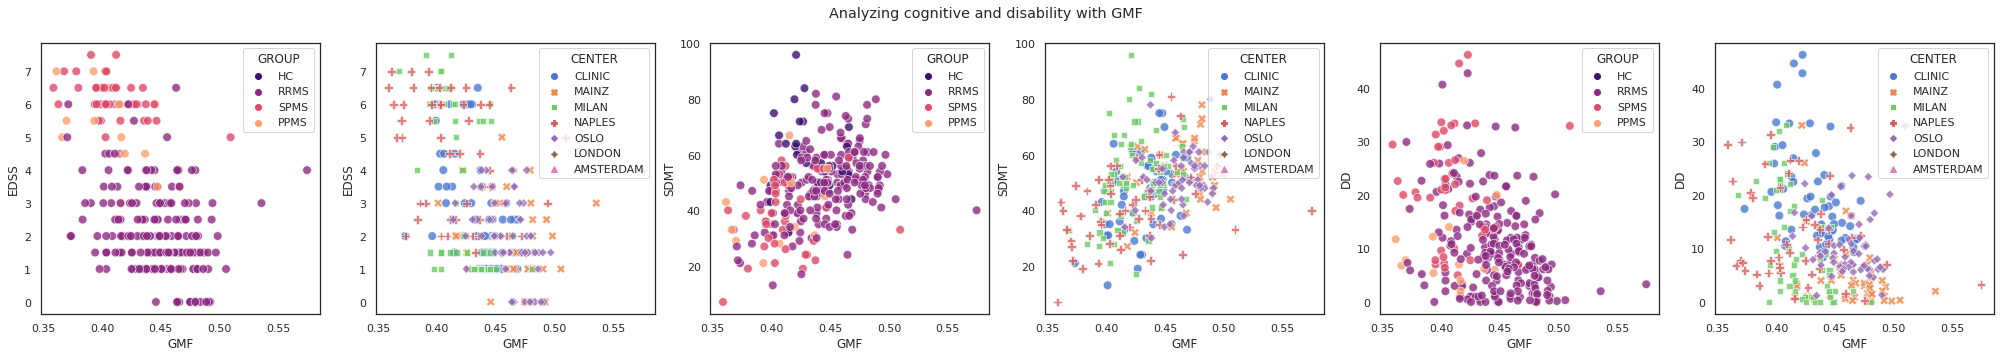

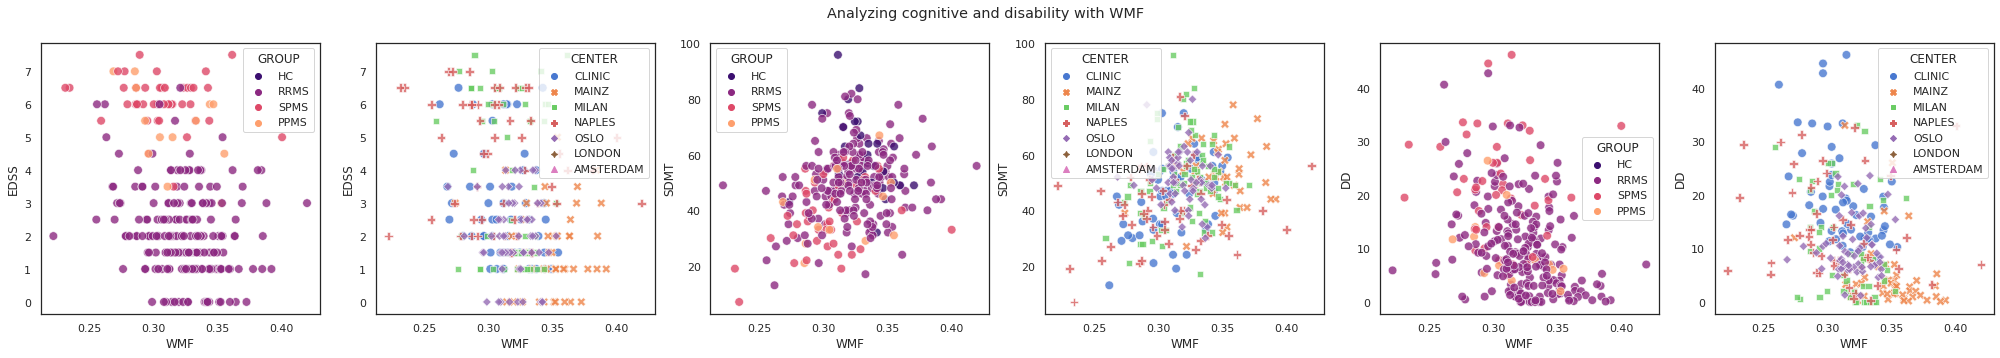

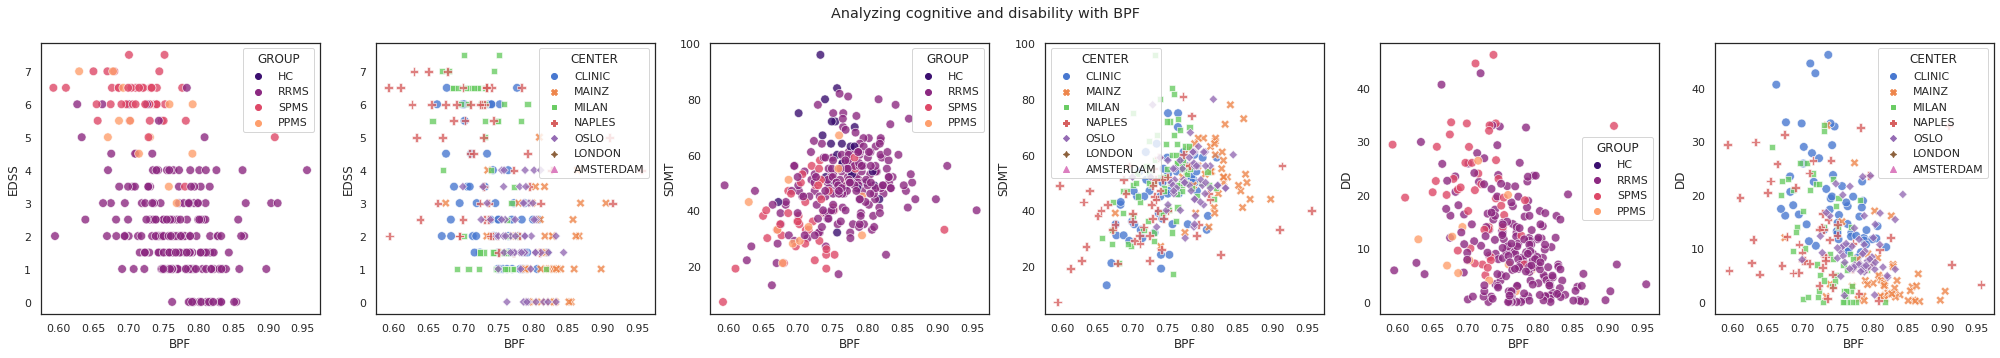

In [ ]:
## Compare different values 
values_to_compare = ["GMF", "WMF", "BPF"]
sns.set_theme(style="white")
# And draw scatter plots: EDSS, SDMT
for val in values_to_compare:
    fig, ((ax1, ax2, ax3, ax4, ax5, ax6)) = plt.subplots(1, 6, figsize=(35,5))
    plt.suptitle("Analyzing cognitive and disability with " + str(val))

    sns.scatterplot(data=df_merged, x=val, y="EDSS", hue="GROUP", palette="magma", hue_order=["HC", "RRMS", "SPMS", "PPMS"], alpha=0.8, s=75, ax=ax1)
    sns.scatterplot(data=df_merged, x=val, y="EDSS", hue="CENTER", style="CENTER", palette="muted", alpha=0.8, s=75, ax=ax2)
    sns.scatterplot(data=df_merged, x=val, y="SDMT", hue="GROUP", palette="magma", hue_order=["HC", "RRMS", "SPMS", "PPMS"], alpha=0.8, s=75, ax=ax3)
    sns.scatterplot(data=df_merged, x=val, y="SDMT", hue="CENTER", style="CENTER", palette="muted", alpha=0.8, s=75, ax=ax4)
    sns.scatterplot(data=df_merged, x=val, y="DD", hue="GROUP", palette="magma", hue_order=["HC", "RRMS", "SPMS", "PPMS"], alpha=0.8, s=75, ax=ax5)
    sns.scatterplot(data=df_merged, x=val, y="DD", hue="CENTER", style="CENTER", palette="muted", alpha=0.8, s=75, ax=ax6)


/tmp/ipykernel_3085035/1232588898.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged["RDl_mean"][df_merged["RDl_mean"] == 0] = np.nan


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. RRMS: t-test independent samples, P_val=2.688e-08 stat=-5.687e+00
RRMS v.s. SPMS: t-test independent samples, P_val=5.618e-04 stat=-3.493e+00
SPMS v.s. PPMS: t-test independent samples, P_val=9.115e-01 stat=1.117e-01
HC v.s. SPMS: t-test independent samples, P_val=2.348e-13 stat=-7.895e+00
RRMS v.s. PPMS: t-test independent samples, P_val=5.991e-02 stat=-1.891e+00
HC v.s. PPMS: t-test independent samples, P_val=1.212e-06 stat=-5.054e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

CLINIC v.s. MAINZ: t-test independent samples, P_val=2.752e-04 stat=-3.730e+00
MAINZ v.s. MILAN: t-test independent samples, P_val=4.084e-01 stat=-8.289e-01
MILAN v.s. NAPLES: t-test independent samples, P_val=2.182e-10 sta

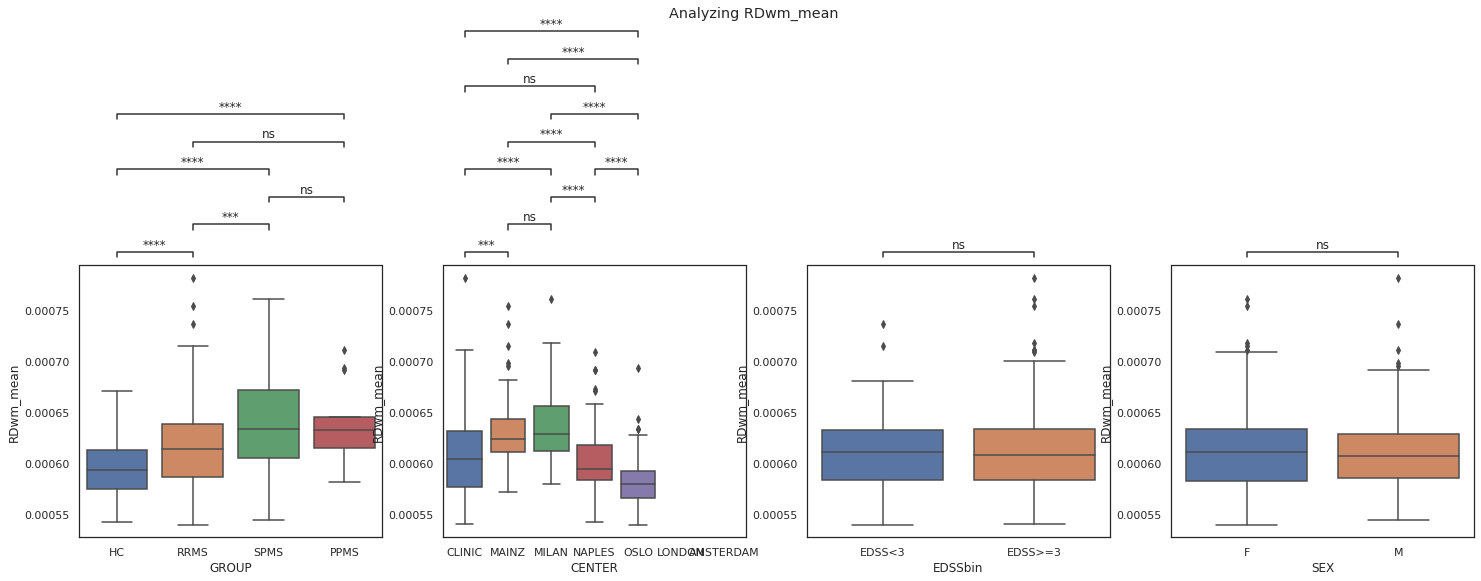

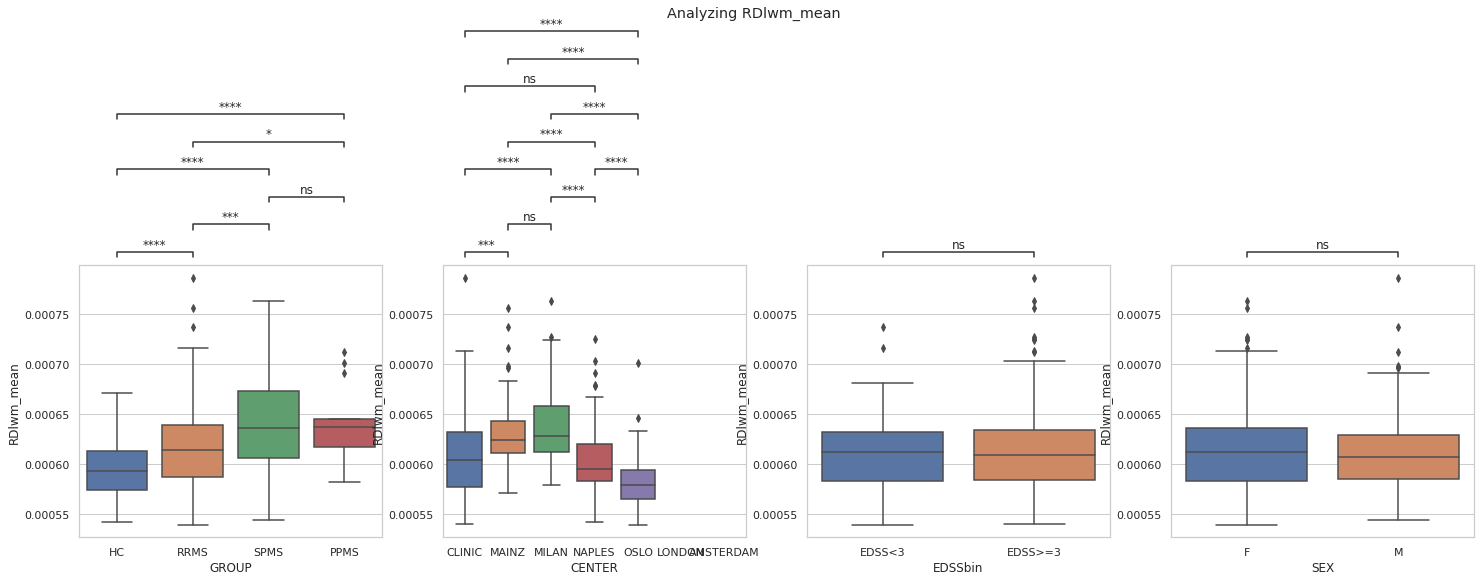

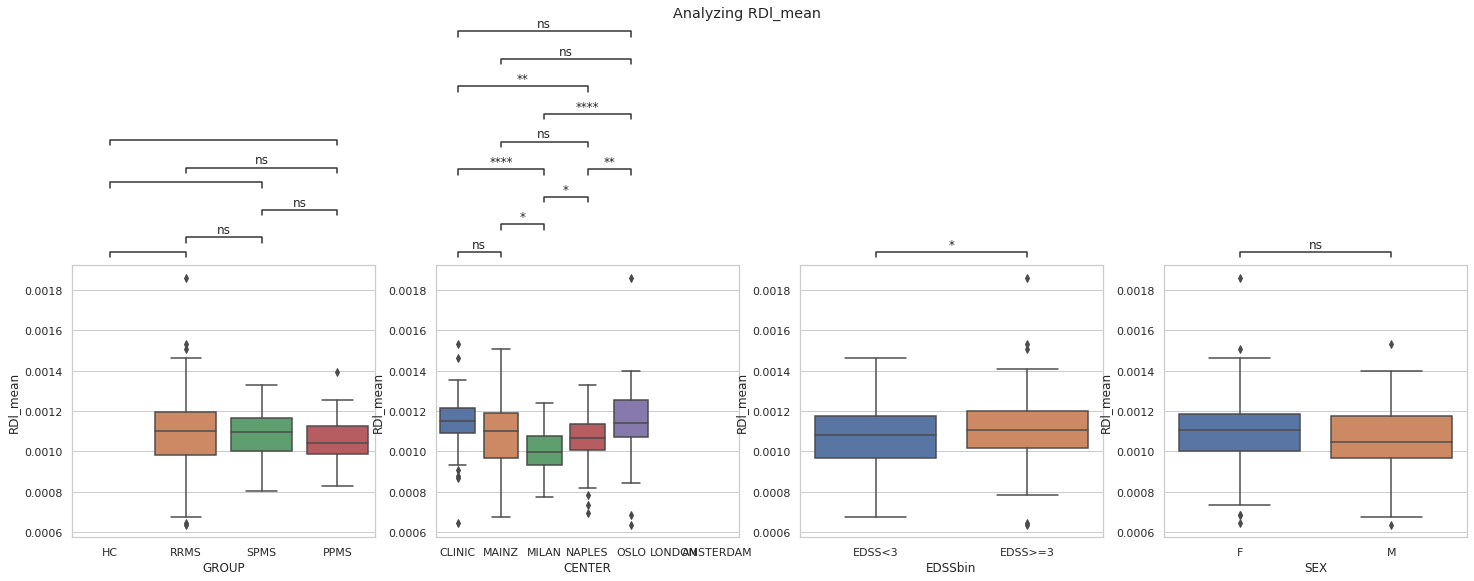

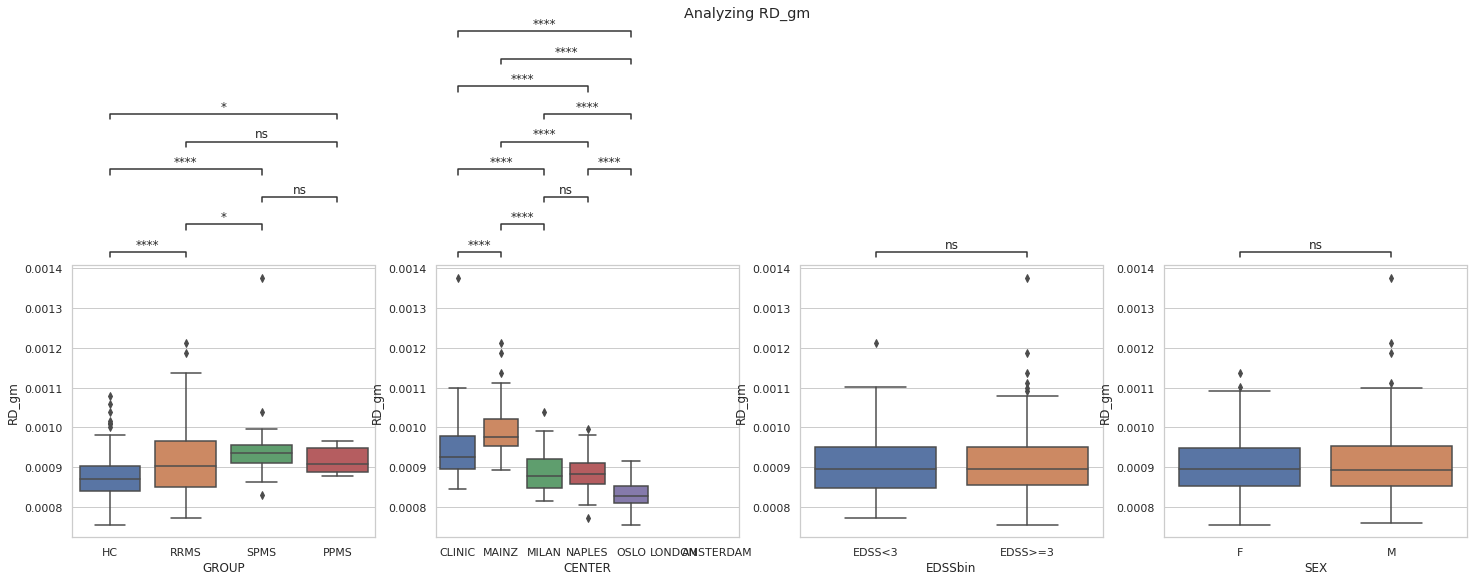

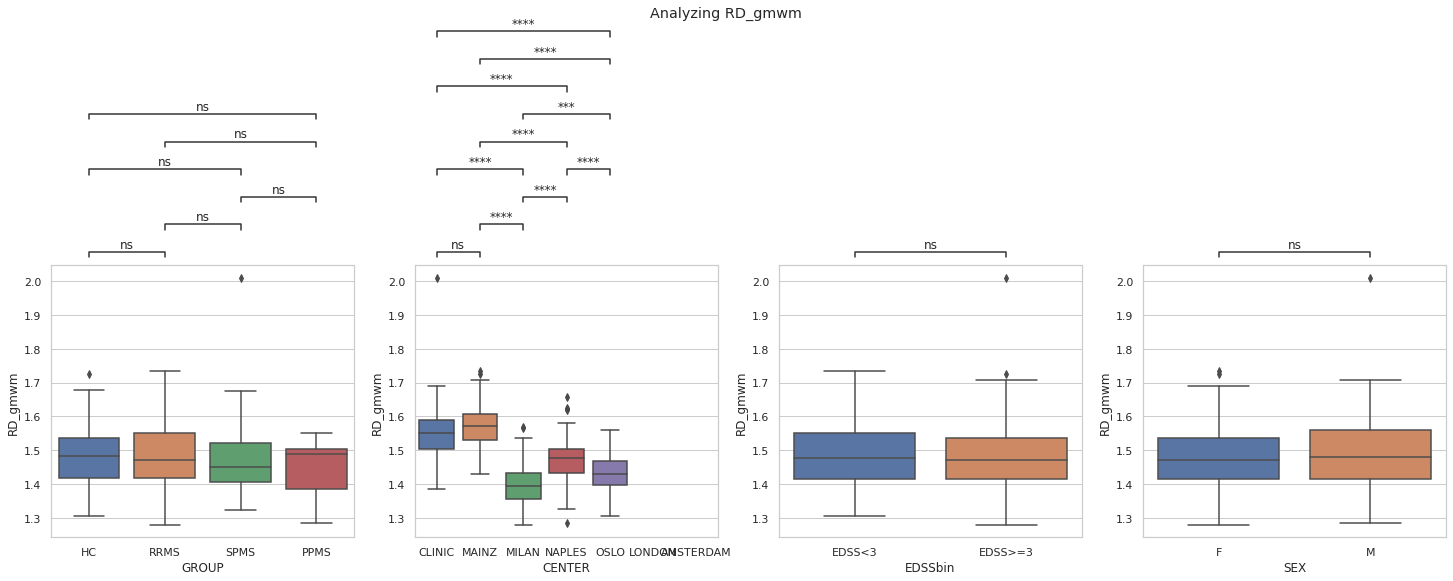

In [ ]:
## RD VALUES
## Compare different values 
## TODO: WE HAVE NORMAL DISTRIBUTIONS. FIND TESTS THAT CAN DO NORMAL DISTRIBUTIONS
# HOW TO COMPARE BETWEEN GROUPS OF NORMAL DISTRIBUTIONS?
values_to_compare = ["RDwm_mean","RDlwm_mean", "RDl_mean", "RD_gm", "RD_gmwm"]

# convert Rdl_mean to Nan if zero
# BECAUSE WE DO NOT WANT ZERO
df_merged["RDl_mean"][df_merged["RDl_mean"] == 0] = np.nan

# draw boxplots
## compare by DX, CENTER, EDSS>3, Sex
for val in values_to_compare:
    fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1, 4, figsize=(25,5))
    plt.suptitle("Analyzing " + str(val), y=1.6)

    ### BY GROUPS
    sns.set(style="whitegrid")
    sns.boxplot(data=df_merged, x="GROUP", order=["HC", "RRMS", "SPMS", "PPMS"], y=val, ax=ax1)
    add_stat_annotation(ax1, data=df_merged, x="GROUP", y=val, order=["HC", "RRMS", "SPMS", "PPMS"],
                        box_pairs=[("HC", "RRMS"), ("HC", "SPMS"), ("HC", "PPMS"), ("RRMS", "SPMS"), ("RRMS", "PPMS"), ("SPMS", "PPMS")],
                        test='t-test_ind', comparisons_correction=None, text_format='star', loc='outside', verbose=1)
    # BY HC - MS
    sns.set(style="whitegrid")
    sns.boxplot(data=df_merged, x="CENTER", y=val, ax=ax2)
    add_stat_annotation(ax2, data=df_merged, x="CENTER", y=val,
                        box_pairs=itertools.combinations(["CLINIC", "MAINZ", "MILAN", "NAPLES", "OSLO"], 2), comparisons_correction=None,
                        test='t-test_ind', text_format='star', loc='outside', verbose=1)

    # BY EDSS
    df_merged['EDSSbin'] = np.where(df_merged['EDSS'] < 3, "EDSS<3", "EDSS>=3")
    sns.set(style="whitegrid")
    sns.boxplot(data=df_merged, x="EDSSbin", y=val, ax=ax3)
    add_stat_annotation(ax3, data=df_merged, x="EDSSbin", y=val,
                        box_pairs=[("EDSS<3", "EDSS>=3")], comparisons_correction=None,
                        test='t-test_ind', text_format='star', loc='outside', verbose=1)

    # BY SEX
    sns.set(style="whitegrid")
    sns.boxplot(data=df_merged, x="SEX", y=val, ax=ax4)
    add_stat_annotation(ax4, data=df_merged, x="SEX", y=val,
                        box_pairs=[("M", "F")], comparisons_correction=None,
                        test='t-test_ind', text_format='star', loc='outside', verbose=1)



p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. RRMS: t-test independent samples, P_val=9.311e-01 stat=8.651e-02
RRMS v.s. SPMS: t-test independent samples, P_val=6.045e-01 stat=5.186e-01
SPMS v.s. PPMS: t-test independent samples, P_val=7.624e-01 stat=3.037e-01
HC v.s. SPMS: t-test independent samples, P_val=5.595e-01 stat=5.846e-01
RRMS v.s. PPMS: t-test independent samples, P_val=5.380e-01 stat=6.167e-01
HC v.s. PPMS: t-test independent samples, P_val=4.933e-01 stat=6.867e-01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

CLINIC v.s. MAINZ: t-test independent samples, P_val=2.286e-17 stat=9.675e+00
MAINZ v.s. MILAN: t-test independent samples, P_val=2.032e-03 stat=-3.136e+00
MILAN v.s. NAPLES: t-test independent samples, P_val=6.660e-08 stat=5.62

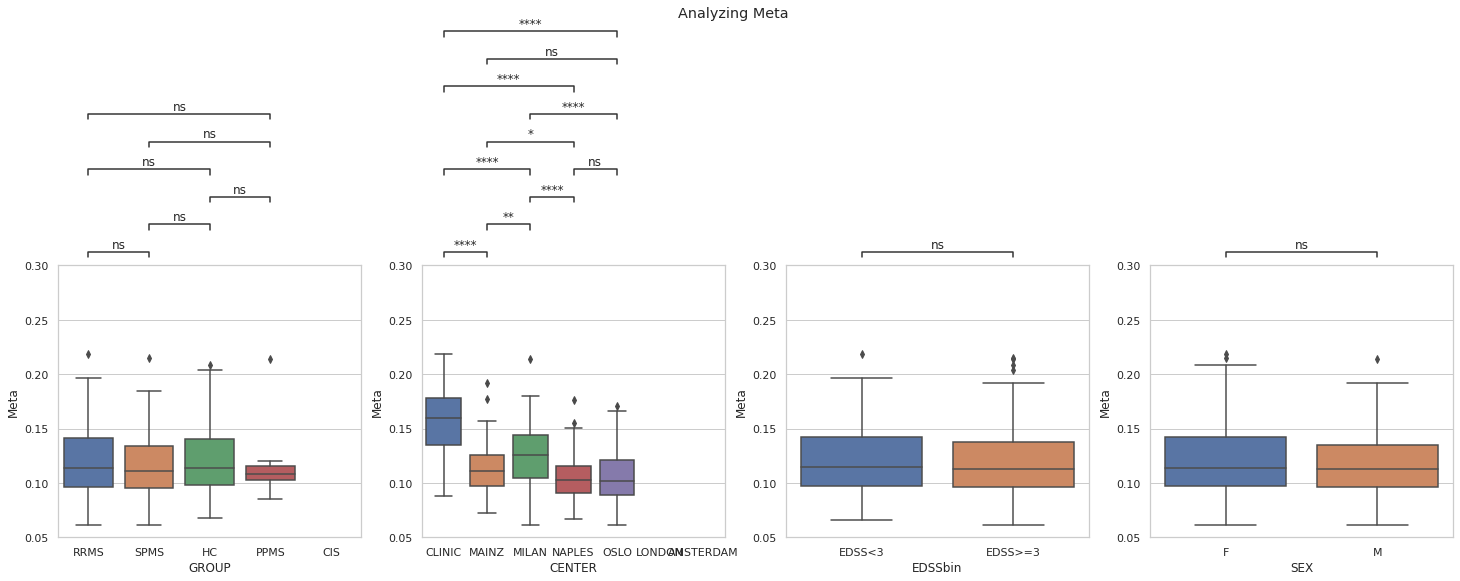

In [10]:
# METASTABILITY
# For meta, jsut just use boxplots
values_to_compare = ["Meta"]

# draw boxplots
## compare by DX, CENTER, EDSS>3, Sex
for val in values_to_compare:
    fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1, 4, figsize=(25,5))
    plt.suptitle("Analyzing " + str(val), y=1.6)

    ### BY GROUPS
    sns.set(style="whitegrid")
    sns.boxplot(data=df_merged, x="GROUP", y=val, ax=ax1)
    ax1.set(ylim=(0.05, 0.3))
    add_stat_annotation(ax1, data=df_merged, x="GROUP", y=val, order=["HC", "RRMS", "SPMS", "PPMS"],
                        box_pairs=[("HC", "RRMS"), ("HC", "SPMS"), ("HC", "PPMS"), ("RRMS", "SPMS"), ("RRMS", "PPMS"), ("SPMS", "PPMS")],
                        test='t-test_ind', comparisons_correction=None, text_format='star', loc='outside', verbose=1)
    # BY HC - MS
    sns.set(style="whitegrid")
    sns.boxplot(data=df_merged, x="CENTER", y=val, ax=ax2)
    ax2.set(ylim=(0.05, 0.3))
    add_stat_annotation(ax2, data=df_merged, x="CENTER", y=val,
                        box_pairs=itertools.combinations(["CLINIC", "MAINZ", "MILAN", "NAPLES", "OSLO"], 2), comparisons_correction=None,
                        test='t-test_ind', text_format='star', loc='outside', verbose=1)

    # BY EDSS
    df_merged['EDSSbin'] = np.where(df_merged['EDSS'] < 3, "EDSS<3", "EDSS>=3")
    sns.set(style="whitegrid")
    sns.boxplot(data=df_merged, x="EDSSbin", y=val, ax=ax3)
    ax3.set(ylim=(0.05, 0.3))
    add_stat_annotation(ax3, data=df_merged, x="EDSSbin", y=val,
                        box_pairs=[("EDSS<3", "EDSS>=3")], comparisons_correction=None,
                        test='t-test_ind', text_format='star', loc='outside', verbose=1)

    # BY SEX
    sns.set(style="whitegrid")
    sns.boxplot(data=df_merged, x="SEX", y=val, ax=ax4)
    ax4.set(ylim=(0.05, 0.3))
    add_stat_annotation(ax4, data=df_merged, x="SEX", y=val,
                        box_pairs=[("M", "F")], comparisons_correction=None,
                        test='t-test_ind', text_format='star', loc='outside', verbose=1)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. RRMS: t-test independent samples, P_val=4.953e-01 stat=6.848e-01
RRMS v.s. SPMS: t-test independent samples, P_val=9.048e-01 stat=1.203e-01
SPMS v.s. PPMS: t-test independent samples, P_val=7.222e-01 stat=3.605e-01
HC v.s. SPMS: t-test independent samples, P_val=5.067e-01 stat=6.676e-01
RRMS v.s. PPMS: t-test independent samples, P_val=6.320e-01 stat=4.828e-01
HC v.s. PPMS: t-test independent samples, P_val=3.313e-01 stat=9.798e-01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

CLINIC v.s. MAINZ: t-test independent samples, P_val=nan stat=nan
MAINZ v.s. MILAN: t-test independent samples, P_val=nan stat=nan
MILAN v.s. NAPLES: t-test independent samples, P_val=nan stat=nan
NAPLES v.s. OSLO: t-test indepe

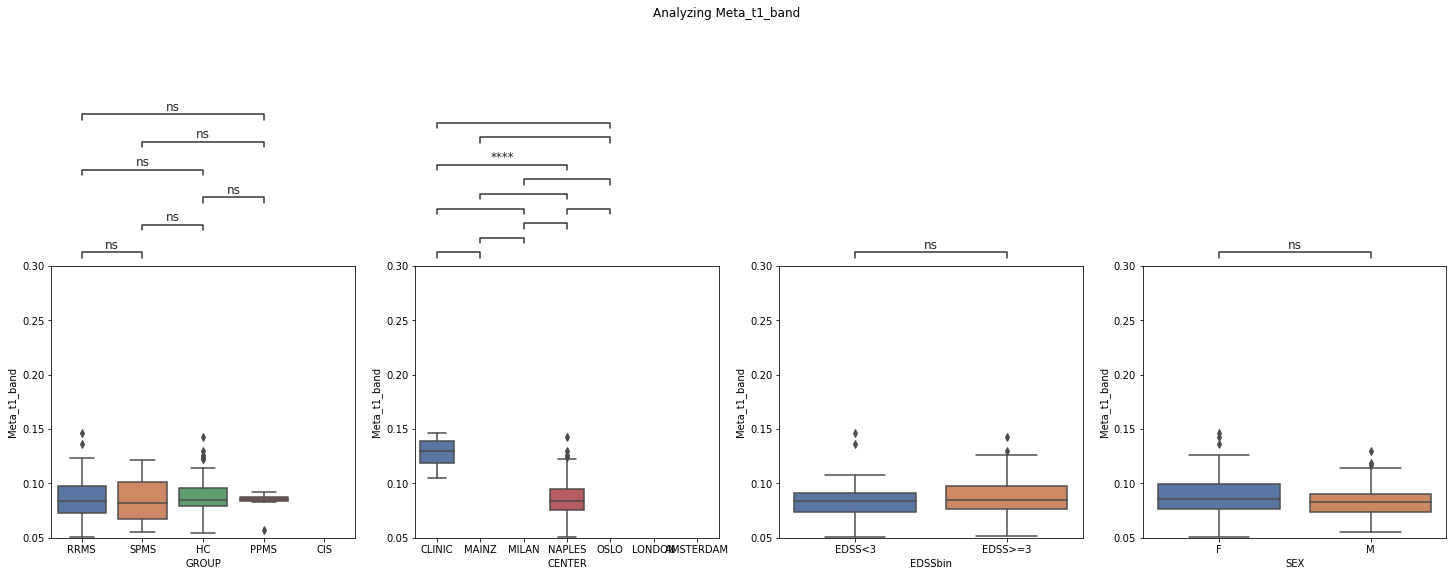

In [5]:
# METASTABILITY
# For meta, jsut just use boxplots
values_to_compare = ["Meta_t1_band"]

# draw boxplots
## compare by DX, CENTER, EDSS>3, Sex
for val in values_to_compare:
    fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1, 4, figsize=(25,5))
    plt.suptitle("Analyzing " + str(val), y=1.6)

    ### BY GROUPS
    sns.set(style="whitegrid")
    sns.boxplot(data=df_merged, x="GROUP", y=val, ax=ax1)
    ax1.set(ylim=(0.05, 0.3))
    add_stat_annotation(ax1, data=df_merged, x="GROUP", y=val, order=["HC", "RRMS", "SPMS", "PPMS"],
                        box_pairs=[("HC", "RRMS"), ("HC", "SPMS"), ("HC", "PPMS"), ("RRMS", "SPMS"), ("RRMS", "PPMS"), ("SPMS", "PPMS")],
                        test='t-test_ind', comparisons_correction=None, text_format='star', loc='outside', verbose=1)
    # BY HC - MS
    sns.set(style="whitegrid")
    sns.boxplot(data=df_merged, x="CENTER", y=val, ax=ax2)
    ax2.set(ylim=(0.05, 0.3))
    add_stat_annotation(ax2, data=df_merged, x="CENTER", y=val,
                        box_pairs=itertools.combinations(["CLINIC", "MAINZ", "MILAN", "NAPLES", "OSLO"], 2), comparisons_correction=None,
                        test='t-test_ind', text_format='star', loc='outside', verbose=1)

    # BY EDSS
    df_merged['EDSSbin'] = np.where(df_merged['EDSS'] < 3, "EDSS<3", "EDSS>=3")
    sns.set(style="whitegrid")
    sns.boxplot(data=df_merged, x="EDSSbin", y=val, ax=ax3)
    ax3.set(ylim=(0.05, 0.3))
    add_stat_annotation(ax3, data=df_merged, x="EDSSbin", y=val,
                        box_pairs=[("EDSS<3", "EDSS>=3")], comparisons_correction=None,
                        test='t-test_ind', text_format='star', loc='outside', verbose=1)

    # BY SEX
    sns.set(style="whitegrid")
    sns.boxplot(data=df_merged, x="SEX", y=val, ax=ax4)
    ax4.set(ylim=(0.05, 0.3))
    add_stat_annotation(ax4, data=df_merged, x="SEX", y=val,
                        box_pairs=[("M", "F")], comparisons_correction=None,
                        test='t-test_ind', text_format='star', loc='outside', verbose=1)